## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    # calculate histogram without using libraries and loops and with numpy
    hist, bins = np.histogram(image, 256, [0, 256])
    return hist

In [30]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  hist = calc_hist(channel)
  cdf = np.cumsum(hist)
  cdf = cdf / cdf[-1]
  return cdf  

In [31]:
def hist_matching(src_image, ref_image):
  '''
  This function takes two images as input, source and reference, and returns a transformed source image
  such that its histogram matches that of the reference image.
  '''
  # Make a copy of the source image to avoid modifying the original
  output_image = src_image.copy()
  
  # Define the channels to be used (RGB)
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  
  # Iterate over each channel
  for channel, title in channels:
    # Calculate the cumulative distribution function (CDF) of the source and reference images for the current channel
    src_cdf = calc_cdf(src_image[:,:,channel])
    ref_cdf = calc_cdf(ref_image[:,:,channel])
    
    # Normalize the CDFs by dividing by the maximum value (255)
    src_cdf = src_cdf / src_cdf[255]
    ref_cdf = ref_cdf / ref_cdf[255]
    
    # Calculate the mapping between the source and reference CDFs
    mapping = np.argmin(np.abs(src_cdf.reshape((256,1)) - ref_cdf), axis=1)
    
    # Apply the mapping to the source image for the current channel
    output_image[:,:,channel] = mapping[src_image[:,:,channel]]

  # Return the transformed source image
  return output_image


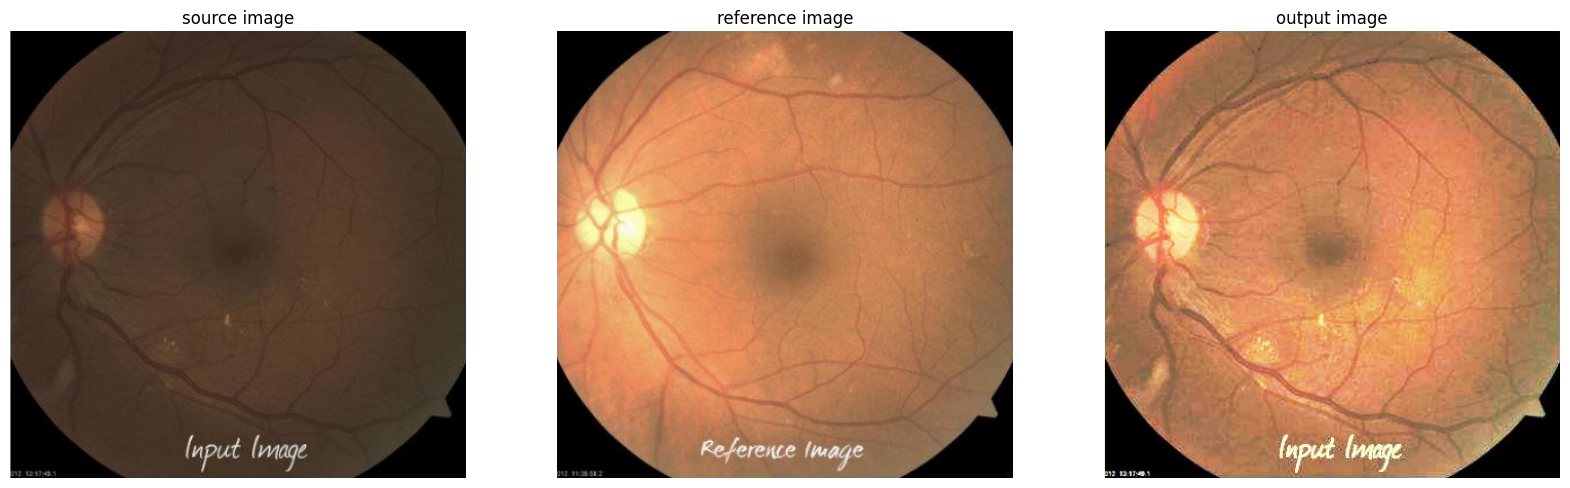

In [32]:
# Do not change this cell
src = cv2.imread('Q4_images/input.png')
ref = cv2.imread('Q4_images/ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

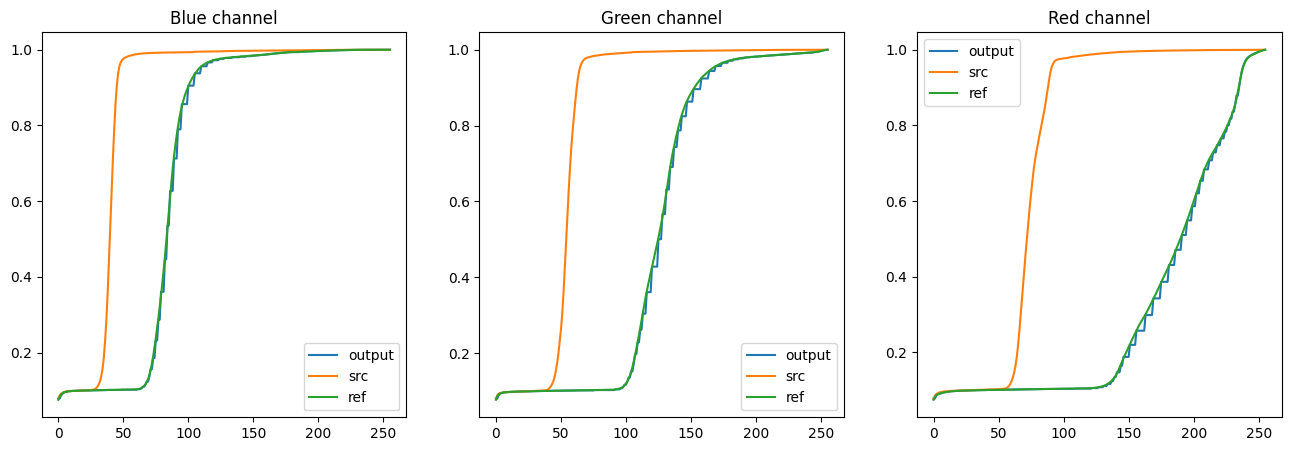

In [33]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)

تطبیق هیستوگرام، همچنین به عنوان یکسان سازی هیستوگرام یا مشخصات هیستوگرام شناخته می شود، تکنیکی است که در پردازش تصویر برای تنظیم کنتراست و روشنایی یک تصویر استفاده می شود. این شامل تغییر مقادیر پیکسل یک تصویر برای مطابقت با هیستوگرام مشخص است، معمولا هیستوگرام که توزیع ایده آل یا دلخواه مقادیر پیکسل را نشان می دهد.

تطبیق هیستوگرام را می توان در کارهای مختلف پردازش تصویر استفاده کرد، از جمله:

1. **افزایش کنتراست تصویر**: تطبیق هیستوگرام را می توان برای افزایش کنتراست تصویر با پخش کردن مقادیر پیکسل در محدوده وسیع تری از سطوح شدت استفاده کرد. این می تواند تصویر را واضح تر و واضح تر نشان دهد.

2. **تصحیح رنگ**: در تصاویر رنگی می توان از تطبیق هیستوگرام برای تنظیم تعادل رنگ یک تصویر استفاده کرد. برای مثال، اگر تصویری بیش از حد آبی به نظر می‌رسد، می‌توان از تطبیق هیستوگرام برای تغییر توزیع رنگ به سمت رنگ‌های گرم‌تر استفاده کرد.

3. **ثبت تصویر**: هنگام ترکیب چندین تصویر در یک تصویر ترکیبی، می توان از تطبیق هیستوگرام برای اطمینان از اینکه تصاویر دارای سطوح روشنایی و کنتراست مشابهی هستند استفاده کرد.

4. **تقسیم بندی تصویر**: تطبیق هیستوگرام می تواند برای تقسیم بندی یک تصویر به مناطق مجزا بر اساس توزیع مقادیر پیکسل استفاده شود. به عنوان مثال، اگر یک تصویر حاوی دو شی مجزا باشد که سطوح روشنایی متفاوتی دارند، می توان از تطبیق هیستوگرام برای تفکیک آنها به دو ناحیه مجزا استفاده کرد.

5. **حذف نویز**: در برخی موارد می توان از تطبیق هیستوگرام برای کاهش اثر نویز در تصویر استفاده کرد. با تنظیم هیستوگرام برای تأکید بر سیگنال زیرین و سرکوب نویز، می توان کیفیت کلی تصویر را بهبود بخشید.